**Big Data**

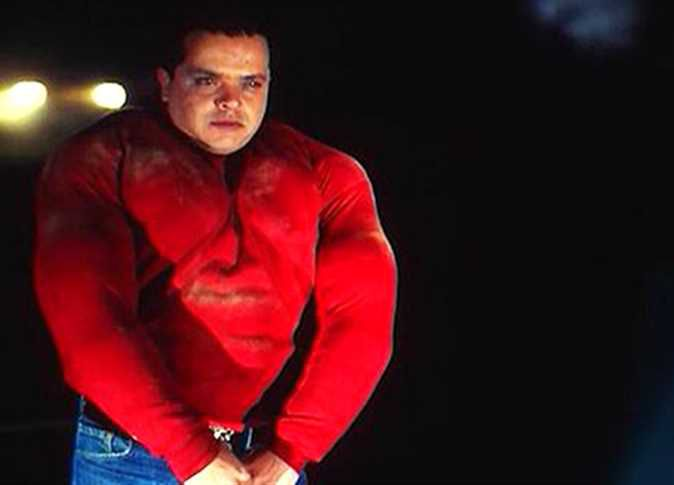

**1- Docker MySql**

In [ ]:
docker exec -it mysql mysql -u root -p

> password password


**Show Databases**

In [ ]:
mysql> show databases;

**Show Tables ?**

In [ ]:
mysql> show tables;

**Task 1 :**

1- **Create** **test** database .

2- **Create** table called employees  u can use this

CREATE TABLE employees (
  id INT PRIMARY KEY AUTO_INCREMENT,
  name VARCHAR(100),
  department VARCHAR(100),
  salary DECIMAL(10, 2)
);

3- **Insert** data in to employees table .

4- **Reterive** data from employees table .


**To run Hadoop eco system use this command .**

In [ ]:
docker exec -it sqoop bash

**Hdfs paths**

In [ ]:
mkdir test # LOCAL PATH

hdfs dfs -mkdir /test # HDFS PATH

In [ ]:
# 1- Create folder on local machine .
# 2- Create file on local machine  .
# 3- Insert data on file
# 4- Check hdfs path ?
# 5- Move this file to hdfs :) .
# 6- Check file moved on hdfs !

In [ ]:
hdfs dfs -copyFromLocal /dataops/mydata.txt /user/root/inputs/

In [ ]:
export HADOOP_CLASSPATH=/usr/share/java/mysql-connector-java.jar

export HADOOP_CLASSPATH=$HADOOP_CLASSPATH:.

**2- Sqoop**

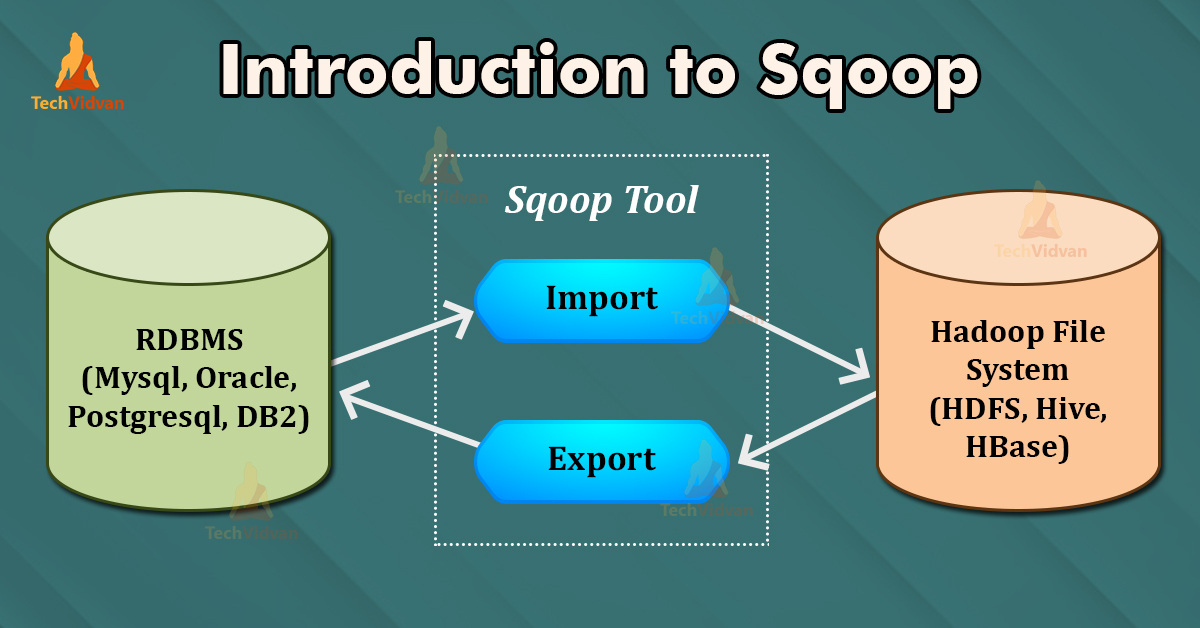

**Eval ?**

In [ ]:
  sqoop eval \
  --connect jdbc:mysql://mysql:3306/test \
  --username root \
  --password password \
  --driver com.mysql.jdbc.Driver \
  --query "SELECT * from employees"

In [ ]:
sqoop eval \
  --connect jdbc:mysql://mysql:3306/test \
  --username root \
  --password password \
  --driver com.mysql.jdbc.Driver \
  --query "SELECT * from students"

**Import ?**

In [ ]:
sqoop import \
  -Dmapreduce.framework.name=local \
  --connect jdbc:mysql://mysql:3306/test \
  --username root \
  --password password \
  --table employees \
  --target-dir /employees_test_successxbb \
  --delete-target-dir \
  --bindir . \
  -m 1

**To show files on hdfs not on your local machine use this**

In [ ]:
hdfs dfs -ls /

**To make sure the data is ingested successfully**

In [ ]:
hdfs dfs -cat /employees_test_successxbb/part-m-00000

In [ ]:
hdfs dfs -cat /students_test_successxbb/part-m-00000

**3- Hive**

**Check Mysql ip**

In [ ]:
for i in {2..10}; do (timeout 1 bash -c "cat < /dev/null > /dev/tcp/172.18.0.$i/3306") && echo "MySQL is at 172.18.0.$i" && break; done

**Check name node ip**

In [ ]:
for i in {2..10}; do
     (timeout 1 bash -c "cat < /dev/null > /dev/tcp/172.18.0.$i/9000" 2> /dev/null) && echo "NameNode (Hadoop) is at 172.18.0.$i" && break; done

# new command
for i in {2..10}; do  
    (timeout 1 bash -c "cat < /dev/null > /dev/tcp/172.18.0.$i/9000" 2> /dev/null) && echo "NameNode (Hadoop) is at 172.18.0.$i" && break
done

**Edit configrution file**

In [ ]:
vi /etc/hosts
172.18.0.3  namenode cluster-master
172.18.0.2  mysql

In [ ]:
schematool -dbType mysql -initSchema

Try this code :)

In [ ]:
hive

In [ ]:
SET hive.exec.mode.local.auto=true; # Enable local execution mode
set hive.vectorized.execution.enabled=true;
set hive.vectorized.execution.reduce.enabled=true;

In [ ]:
DROP TABLE employees_final; # if exists

CREATE EXTERNAL TABLE employees_final (
    id INT,
    name STRING,
    dept STRING,
    salary DOUBLE
) 
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LOCATION '/employees_test_successxbb'; # hdfs path

In [ ]:
DROP TABLE employees; # if exists

CREATE EXTERNAL TABLE employees (
    id INT,
    name STRING,
    dept STRING,
    salary DOUBLE
) 
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LOCATION '/employees_test_successxbb'; # hdfs path

In [ ]:
INSERT INTO TABLE employees VALUES 
(1,'John_Doe','IT',6000.0),
(2,'Jane_Smith','HR',5500.0),
(3,'Michael_Brown','Finance',7000.0),
(4,'Emily_Davis','IT',6200.0),
(5,'William_Wilson','Marketing',5800.0),
(6,'Linda_Johnson','IT',6100.0),
(7,'David_Martinez','Sales',5400.0),
(8,'Susan_Anderson','HR',5600.0),
(9,'Robert_Taylor','Finance',7200.0),
(10,'Mary_Thomas','Marketing',5900.0),
(11,'Charles_Moore','IT',6300.0),
(12,'Patricia_Jackson','Sales',5300.0),
(13,'Joseph_White','IT',6400.0),
(14,'Jennifer_Harris','HR',5700.0),
(15,'Thomas_Martin','Finance',7100.0),
(16,'Elizabeth_Thompson','Marketing',6000.0),
(17,'Christopher_Garcia','IT',6500.0),
(18,'Barbara_Martinez','Sales',5200.0),
(19,'Daniel_Robinson','IT',6600.0),
(20,'Sarah_Clark','HR',5800.0);

In [ ]:
# use hive to select your table :)
SELECT * FROM employees_final;

**Now the data ingested successfully 🔥**

**Sqoop Export ?**

In [ ]:
CREATE TABLE employees_exported2 (
     id INT ,
  name VARCHAR(100),
  department VARCHAR(100),
  salary DECIMAL(10, 2)
);

In [ ]:
INSERT INTO employees_exported2 (name, department, salary) VALUES
(' Salammox', 'Big DATA', 10000.00);

In [ ]:
sqoop export \
  -Dmapreduce.framework.name=local \
  --connect jdbc:mysql://172.18.0.2:3306/test \
  --username root \
  --password password \
  --table employees \
  --export-dir /user/hive/warehouse/employees \
  --input-fields-terminated-by ',' \
  --input-null-string '\\N' \
  --input-null-non-string '\\N' \
  --bindir . \
  -m 1

**Now data exported to your RDBMS 😁**

In [ ]:
#Task
'''
check exported data !
'''